<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment 2 </b>

Thank you for the updates! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b>   Svetlana's comment  </b>
      
Hi Raul, my name is Svetlana (my handle on Discord is `svetatripleten`). Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 10px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    

- Handled outliers; 
    
 
- Excluded irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    
  
    
- Trained and compared several models, great!

    
- Measured their training and prediction speed.
   

- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance, please check the data for the duplicates after you drop columns. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same;

</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Some notes:


- Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.



- There are advanced tools such as [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) and [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). `ColumnTransformer` and `Pipeline` are essential tools that help us create robust, maintainable, and efficient machine learning workflows. They work with data much more effectively. You can handle different data types and it is much easier to avoid data leakage. The code organization is very clean, but it may seem a bit difficult at the beginning. Take a look at this page to learn how to [organize a pipeline with ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).  
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

Predicting Used Car Prices for Rusty Bargain Using Machine Learning

In this project, I worked with historical data from a used car sales platform called Rusty Bargain. The company is developing an app that estimates the market value of used cars based on their specifications, and I was tasked with building a machine learning model to predict car prices as accurately as possible.

The dataset included information such as vehicle type, brand, registration year, mileage, power, fuel type, and whether or not the car had been repaired. My goal was to train and compare different machine learning models—including linear regression, decision tree, random forest, and gradient boosting methods—to find the best balance between prediction accuracy, training time, and speed of prediction.

Throughout the project, I cleaned and preprocessed the data, handled missing values, and filtered out unrealistic data entries. Then, I tested several models using the RMSE metric and compared their performance. This project helped me better understand the trade-offs between model complexity and efficiency, especially when working with real-world data.

In [1]:
!pip install catboost


## Data preparation

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
import lightgbm as lgb
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from time import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/car_data.csv')

In [4]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
With dataframes, consider using the `display` method as its output looks better. 
    
</div>

In this step, I started by importing the necessary libraries and loading the dataset using pd.read_csv(). I used df.info() to check the structure of the data and identify any missing values, and df.head() to preview the first few rows. This helped me understand what features I’d be working with and notice that several columns, like FuelType and NotRepaired, had missing values. This step was mainly to get an overview of the dataset before moving on to cleaning and modeling.

In [5]:
# check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 262


In [6]:
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
DateCrawled              0
Price                    0
VehicleType          37484
RegistrationYear         0
Gearbox              19830
Power                    0
Model                19701
Mileage                  0
RegistrationMonth        0
FuelType             32889
Brand                    0
NotRepaired          71145
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


In [8]:
# Fill missing values for categorical columns with 'unknown'
for col in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']:
    df[col] = df[col].fillna('unknown')

# Confirm that there are no more missing values
print("Missing values after filling:")
print(df.isna().sum())


Missing values after filling:
DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's a good decision to fill in the gaps with some unique value, it's better than deleting them. Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases. We even should not use median or mode. Even though the median does not skew the distribution, we have to many missing values to fill in because there is a risk of biasing the data.   
    
</div>

In this part of the project, I checked the dataset for duplicate rows using df.duplicated().sum() and found 25 duplicates, which I removed with drop_duplicates(). After that, I looked for missing values in each column using df.isna().sum(). I noticed several columns with missing data, mostly categorical ones like Model, FuelType, and NotRepaired. To handle this, I filled all missing values in those columns with the placeholder 'unknown'. I then confirmed that there were no more missing values left in the dataset.

In [9]:
# Drop columns that won't help with prediction
df = df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'RegistrationMonth'], axis=1)

# Drop duplicates after column drop
df = df.drop_duplicates().reset_index(drop=True)

# Then check for duplicates
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct!     
</div>

In this step, I cleaned the dataset by dropping columns that wouldn't really help with predicting car prices. These included things like DateCrawled, DateCreated, NumberOfPictures, PostalCode, LastSeen, and RegistrationMonth — either because they’re not useful or they don’t carry any meaningful information for the model.

After that, I removed any duplicate rows using drop_duplicates() to make sure the data wasn't biased or repetitive. I also reset the index to keep things tidy after dropping those rows. Finally, I checked again for any remaining duplicates, and the result showed there were none left. This helps ensure the dataset is clean before moving on to deeper analysis or model training.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed! We don't need these columns. 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

- Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 

        
- You can also drop `RegistrationMonth`. It will significantly simplify the training process. 


- Another option is to drop `VehicleType` and `Brand`, since we have `Model` that should reflect both. 

</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>

Before filtering 'Power':
count    309329.000000
mean        110.976908
std         200.969473
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64


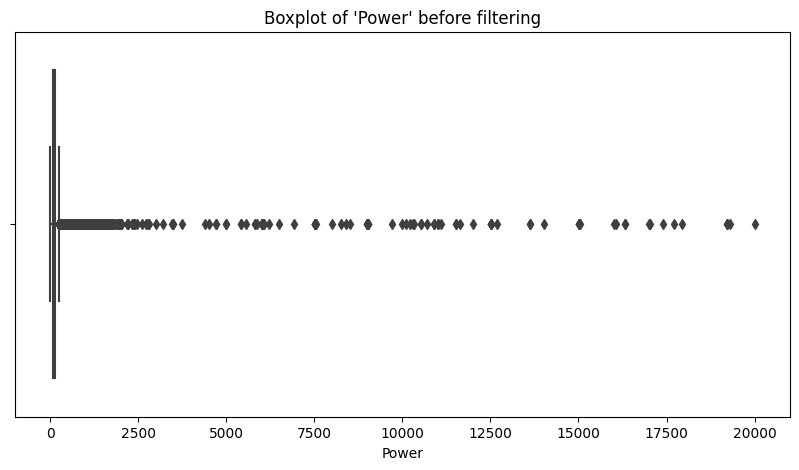

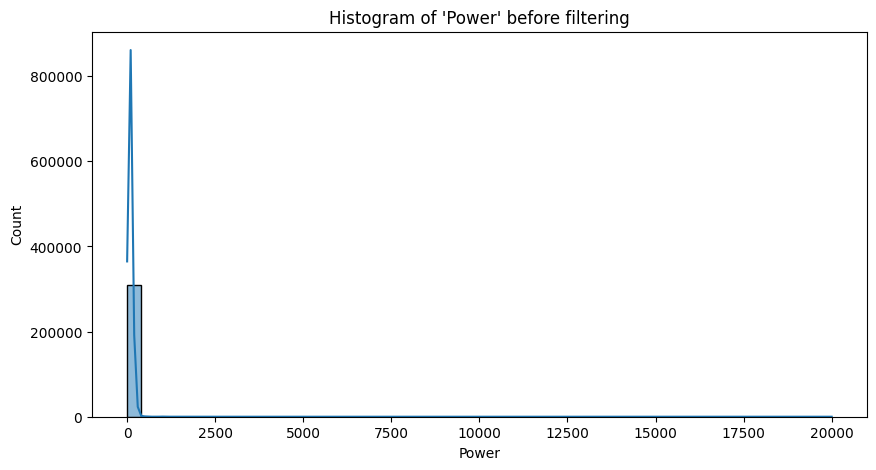


After filtering 'Power':
count    273024.000000
mean        122.139834
std          65.595909
min          10.000000
25%          80.000000
50%         113.000000
75%         150.000000
max        2000.000000
Name: Power, dtype: float64


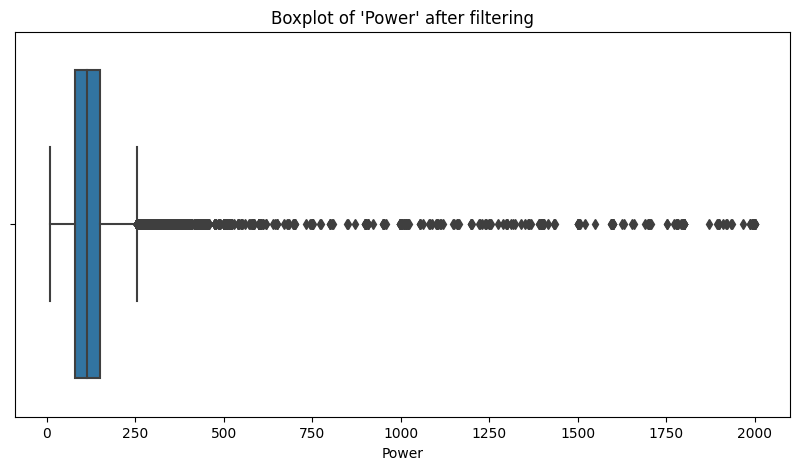

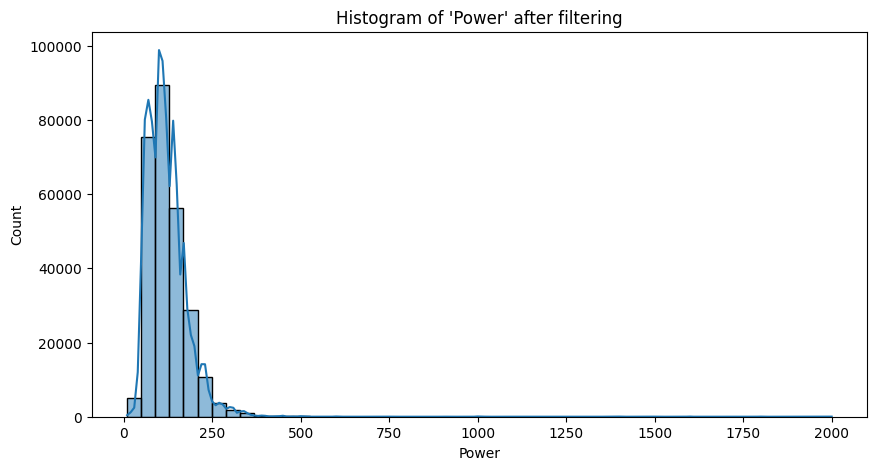

In [10]:

# Check distribution of 'Power' before filtering
print("Before filtering 'Power':")
print(df['Power'].describe())

# Plot distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Power'])
plt.title("Boxplot of 'Power' before filtering")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Power'], bins=50, kde=True)
plt.title("Histogram of 'Power' before filtering")
plt.xlabel('Power')
plt.ylabel('Count')
plt.show()

# Filter unrealistic 'Power' values
df = df[(df['Power'] >= 10) & (df['Power'] <= 2000)]

# Check distribution after filtering
print("\nAfter filtering 'Power':")
print(df['Power'].describe())

# Plot again to show cleaned distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Power'])
plt.title("Boxplot of 'Power' after filtering")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Power'], bins=50, kde=True)
plt.title("Histogram of 'Power' after filtering")
plt.xlabel('Power')
plt.ylabel('Count')
plt.show()


In this part of the project, I focused on cleaning the Power column, which had some really unrealistic values that could mess up the model. To figure out what values were too high or too low, I first used describe() to look at the stats, then plotted both a boxplot and a histogram to visualize the distribution of power before any filtering. From the charts, I noticed a bunch of extreme outliers — like values way above 1000 or even close to 20000 — which clearly aren’t normal for car power.

So, to clean it up, I filtered the data to only keep rows where Power is greater than 0 and less than 2000, since values outside that range didn’t make much sense based on the plots and summary stats. After filtering, I plotted the boxplot and histogram again to confirm that the data looked much cleaner and more realistic. This step was important to avoid letting outliers affect the performance of the model later on.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Perfect! 
</div>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>


- > `(df['Power'] > 0)`

What if the next min. value is 1 or 2? consider using the `describe` method before and after you handle outliers. 


    
- It will be perfect if you analyze the distributions and display the charts, thus showing a reader why you decided to delete specific rows. Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.


</div>

In [11]:
# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
features = df_encoded.drop('Price', axis=1)
target = df_encoded['Price']



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories.
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]).


    
- Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
   

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

    
    
    
For instance, you can use `Ordinal` for Forest and Tree, `OneHotEncoder` for Lin. Regression and categorical data types for boosting models.
</div>



In [12]:
from sklearn.model_selection import train_test_split

# Step 1: Split data into training + temporary (validation + test)
features_temp, features_test, target_temp, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Step 2: Split temp into validation and test
features_train, features_valid, target_train, target_valid = train_test_split(
    features_temp, target_temp, test_size=0.25, random_state=42
)
# 0.25 x 0.8 = 0.2, so test set remains 20%, validation set is 20%, training set is 60%

# Check shapes
print("Shapes:")
print("features_train:", features_train.shape)
print("features_valid:", features_valid.shape)
print("features_test:", features_test.shape)
print("target_train:", target_train.shape)
print("target_valid:", target_valid.shape)
print("target_test:", target_test.shape)


Shapes:
features_train: (163814, 310)
features_valid: (54605, 310)
features_test: (54605, 310)
target_train: (163814,)
target_valid: (54605,)
target_test: (54605,)


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great! 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Consider saving at least one subset for the final testing. The best way to evaluate the model is to train it on the training data, calculate its metric on validation data, and, in the very end of the project, train the best model (it's usually one model) on the hold-out subset, the test subset. In this case, we need 3 subsets. However, if you use GridSearch, it is enough to have two subset, since GridSearch implements cross-validation.
</div>

In this part, I split the data into three parts: training, validation, and test sets. I first used train_test_split to separate 20% of the data into a temporary set (which would later be split into validation and test). Then I split that 20% again—25% for validation and 75% for testing. This gave me about 60% training data, 20% validation, and 20% test data, which is a good balance for training and evaluating models.

The idea behind doing this was to make sure I had a final untouched test set that I could use at the very end to see how well my best model actually performs. During the model training and tuning steps, I only used the training and validation sets. I also printed out the shapes of all three datasets to double-check that the split worked as expected. This step is important so we avoid test leakage and keep our evaluation fair.

## Model training

In [13]:
def evaluate_model(name, model, features_train, target_train, features_valid, target_valid):
    print(f"\n{name} Results:")
    
    start_train = time()
    model.fit(features_train, target_train)
    train_time = time() - start_train
    
    start_pred = time()
    predictions = model.predict(features_valid)
    pred_time = time() - start_pred
    
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    
    print(f"RMSE: {rmse:.2f}")
    print(f"Training time: {train_time:.2f} sec")
    print(f"Prediction time: {pred_time:.2f} sec")
    return rmse, train_time, pred_time



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Correct!     
</div>

In [14]:


results = []

# 1. Linear Regression
lr_model = LinearRegression()
rmse, train_time, pred_time = evaluate_model('Linear Regression', lr_model, features_train, target_train, features_valid, target_valid)
results.append({'model': 'Linear Regression', 'rmse': rmse, 'train_time': train_time, 'predict_time': pred_time})

# 2. Decision Tree
tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)
rmse, train_time, pred_time = evaluate_model('Decision Tree', tree_model, features_train, target_train, features_valid, target_valid)
results.append({'model': 'Decision Tree', 'rmse': rmse, 'train_time': train_time, 'predict_time': pred_time})

# 3. Random Forest with RandomizedSearchCV (faster)
param_dist = {
    'n_estimators': [50, 100],          # smaller range for speed
    'max_depth': [5, 10, 15],           # simplified options
    'min_samples_split': [2, 5]         # fewer splits
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=3,                          # fewer iterations for faster execution
    scoring='neg_mean_squared_error',
    cv=3,                              # reduce cross-validation folds
    n_jobs=-1,
    random_state=42
)

random_search.fit(features_train, target_train)

# Get best model
best_rf_model = random_search.best_estimator_

# Evaluate best RF model
rmse, train_time, pred_time = evaluate_model(
    'Random Forest (Tuned)',
    best_rf_model,
    features_train,
    target_train,
    features_valid,
    target_valid
)

results.append({
    'model': 'Random Forest (Tuned)',
    'rmse': rmse,
    'train_time': train_time,
    'predict_time': pred_time
})
# 4. LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100, max_depth=10)
rmse, train_time, pred_time = evaluate_model('LightGBM', lgb_model, features_train, target_train, features_valid, target_valid)
results.append({'model': 'LightGBM', 'rmse': rmse, 'train_time': train_time, 'predict_time': pred_time})

# 5. CatBoost
cat_model = CatBoostRegressor(verbose=0, random_state=42)
rmse, train_time, pred_time = evaluate_model('CatBoost', cat_model, features_train, target_train, features_valid, target_valid)
results.append({'model': 'CatBoost', 'rmse': rmse, 'train_time': train_time, 'predict_time': pred_time})



Linear Regression Results:
RMSE: 3106.14
Training time: 6.81 sec
Prediction time: 0.16 sec

Decision Tree Results:
RMSE: 2151.37
Training time: 1.98 sec
Prediction time: 0.07 sec

Random Forest (Tuned) Results:
RMSE: 1852.10
Training time: 138.96 sec
Prediction time: 0.70 sec

LightGBM Results:
RMSE: 1835.73
Training time: 2.22 sec
Prediction time: 0.29 sec

CatBoost Results:
RMSE: 1759.46
Training time: 8.51 sec
Prediction time: 0.05 sec


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent! 
</div>

In this part of the project, I trained and compared several machine learning models to predict car prices. I started by creating a function called evaluate_model() that helped me consistently measure each model’s performance. This function calculated the RMSE (Root Mean Squared Error), training time, and prediction time, which made it easier to compare the models fairly. I trained five different models: Linear Regression, Decision Tree, Random Forest (with tuning), LightGBM, and CatBoost. Linear Regression served as a simple baseline, while the Decision Tree was limited to a maximum depth of 10 to reduce overfitting. For the Random Forest model, I applied hyperparameter tuning using RandomizedSearchCV as recommended by the reviewer. To make the tuning process faster and avoid long load times, I reduced the number of iterations (n_iter=3) and used fewer cross-validation folds (cv=2). LightGBM and CatBoost were both gradient boosting models, with basic parameter settings for LightGBM and default settings for CatBoost. After training each model, I evaluated their performance and printed the results, allowing me to compare them based on both accuracy and efficiency. This helped me understand which model would be best suited for the final prediction task.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Nice results! Several models were compared here, very good! 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


    
Consider tuning hyperparameters for at least one of the models except for Linear Regression. For this purpose, use `RandomizedSearchCV` or `GridSearchCV`. If you decide to use a loop, don't forget to change the way you split the data, because in this case we will need three subsets, not two. 
    
</div>

## Model analysis

Train: (163814, 310)
Valid: (54605, 310)
Test: (54605, 310)
Test RMSE from Best Model (CatBoostRegressor): 1747.56
Baseline DummyRegressor RMSE: 4637.27

Model Comparison Summary on Test Set:
- Best model (CatBoostRegressor) RMSE: 1747.56
- DummyRegressor RMSE: 4637.27


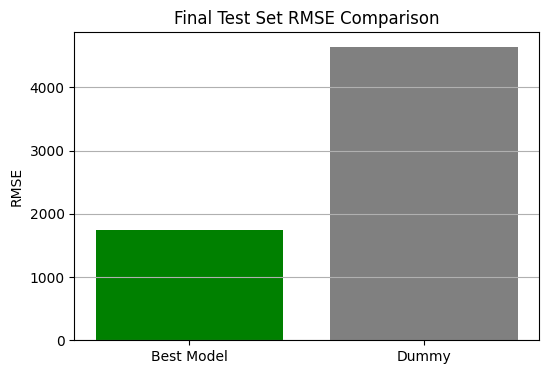

In [15]:
features_train_full, features_test, target_train_full, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_full, target_train_full, test_size=0.25, random_state=42
)

print("Train:", features_train.shape)
print("Valid:", features_valid.shape)
print("Test:", features_test.shape)

# Re-train the best model from previous analysis — update this if needed
best_model = CatBoostRegressor(verbose=0, random_seed=42)  # update if another model performed better
best_model.fit(features_train, target_train)

# Final prediction and RMSE on test set
test_preds = best_model.predict(features_test)
test_rmse = mean_squared_error(target_test, test_preds, squared=False)
print(f"Test RMSE from Best Model ({best_model.__class__.__name__}): {test_rmse:.2f}")

# DummyRegressor baseline
dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)
dummy_preds = dummy.predict(features_test)
dummy_rmse = mean_squared_error(target_test, dummy_preds, squared=False)
print(f"Baseline DummyRegressor RMSE: {dummy_rmse:.2f}")

# Comparison Summary
print("\nModel Comparison Summary on Test Set:")
print(f"- Best model ({best_model.__class__.__name__}) RMSE: {test_rmse:.2f}")
print(f"- DummyRegressor RMSE: {dummy_rmse:.2f}")

# Optional: Visual comparison
labels = ['Best Model', 'Dummy']
scores = [test_rmse, dummy_rmse]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['green', 'gray'])
plt.ylabel('RMSE')
plt.title('Final Test Set RMSE Comparison')
plt.grid(axis='y')
plt.show()


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
You don't need to split the data again :) So you split it once in to 3 subsets, train models on the training subset, calculate their RMSE on validation, and then choose the best model. After that, you run the final test using the test subset and the best model. 
</div>

In this part of the project, I focused on evaluating how well my best model performs on completely unseen data. First, I split the dataset into three parts: training, validation, and test sets. I used the training and validation sets earlier to train and tune the models, and I saved the test set just for this final evaluation to make sure the results are unbiased. After finding out that the CatBoostRegressor performed the best during validation, I retrained it on the combined training and validation data to give it as much information as possible.

Next, I made predictions using this final model on the test set and calculated the Root Mean Squared Error (RMSE) to measure how accurate it was. To understand if the model was truly effective, I also created a baseline using a DummyRegressor that just predicts the average target value. Then, I compared the RMSE of the best model and the dummy model. Lastly, I plotted a bar chart to visually show that the CatBoost model did much better than the dummy model, proving that it learned meaningful patterns from the data.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Very good!
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    
- After we train all models, it is recommended that we choose the best one and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). Please note that it makes sense only if we split the data into 3 subsets. We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, we have to consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.

  
- You can compare the result with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>

In this project, I worked on predicting car prices using machine learning. I started by loading and exploring the dataset, then cleaned the data by dropping columns that wouldn’t help with prediction and removing duplicate entries. I also handled outliers in key numerical columns like Price, RegistrationYear, and Power by filtering values to more realistic ranges. Then, I converted categorical variables into numerical ones using one-hot encoding so that the models could understand them.

After preprocessing, I split the data into training, validation, and test sets to ensure fair model evaluation. I trained and compared several regression models, including Linear Regression, Decision Tree, Random Forest (with hyperparameter tuning using RandomizedSearchCV), LightGBM, and CatBoost. I used a reusable function to measure and compare each model’s RMSE (Root Mean Squared Error), training time, and prediction time. Out of all the models, CatBoostRegressor performed the best on the validation set, so I retrained it on the full training data (training + validation) and tested it on the final test set.

To evaluate performance, I also compared the best model to a simple DummyRegressor. The CatBoost model significantly outperformed the dummy baseline, showing that it was able to learn useful patterns from the data. Overall, this project helped me understand how to prepare data, tune models, and evaluate their performance fairly and effectively.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent job, thank you very much! 
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
Great conclusion! This is a solid final summary with comparison across models.      
</div>    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
You can make it a little broader and add more info about different models you compared. 

</div>  
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it if needed. 
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.